In [7]:
# import
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
# load dataset
# load the MNIST dataset, containing 70,000 28x28 images showing handwritten digits.
# load this dataset using Kera
# function returns the dataset split into train and test sets.

# x_train and x_test contain our train and test images.
# y_train and y_test contain the target values: a number between 0 and 9 indicating the digit shown in the corresponding image.
# 60,000 images to train the model and 10,000 to test it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# print out
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# preprocess dataset
# train data
# Each pixel goes from 0 to 255. Neural networks work much better with smaller values.
# Need to normalize pixels by dividing them by 255. That way, each pixel will go from 0 to 1.
x_train = x_train.astype('float32') / 255.0
# When dealing with images, we need a tensor with 4 dimensions: batch size, width, height, and color channels.
# x_train/y_train are (60000, 28, 28). Need to reshape it to add the missing dimension ("1" because these images are grayscale.)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# Target values go from 0 to 9 (the value of each digit.)
# This line one-hot encodes these values.
# For example, this will transform a value 5, in an array of zeros with a single 1 corresponding to the fifth position:
# [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train_one_hot = to_categorical(y_train)

# test data
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_test_one_hot = to_categorical(y_test)

In [6]:
# print out data
# print out train data
print('-- train data')
print(x_train.shape)
print(y_train.shape)
print(y_train[0])
print(y_train_one_hot.shape)
print(y_train_one_hot[0])

# print out test data
print('-- test data')
print(x_test.shape)
print(y_test.shape)
print(y_test_one_hot.shape)

-- train data
(60000, 28, 28, 1)
(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
-- test data
(10000, 28, 28, 1)
(10000,)
(10000, 10)


In [8]:
# variables
num_classes = 10
input_shape = (28, 28, 1)

# build the model
# a sequence of conv2D/MaxPool blocks plus a Dense layer as a classifier
model = Sequential()

# Input layer
# input shape: a 28x28x1 tensor (width, height, channels)
model.add(Input(shape=input_shape))

# ConvNet Block 1
# Conv2D layer with 32 filters and a 3x3 kernel
# This Conv2D layer will generate 32 different representations using the training images
# Also need to define the activation function used for this layer: ReLU
# Relu will allow us to solve non-linear problems, like recognizing handwritten digits.
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
# After our Conv2D layer, we have a max pooling operation.
# The goal of this layer is to downsample the amount of information collected by the convolutional layer.
# Want to throw away unimportant details and retain what truly matters.
model.add(MaxPooling2D(pool_size=(2, 2)))

# ConvNet Block 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
# We are now going to flatten the output. We want everything in a continuous list of values.
# That's what the Flatten layer does. It will give us a flat tensor.
model.add(Flatten())
# Add a dropout for regularization
model.add(Dropout(0.5))
# the output layer has a size of 10, one for each of our possible digit values, and a softmax activation.
# The softmax ensures we get a probability distribution indicating the most likely digit in the image.
model.add(Dense(units=num_classes, activation='softmax'))

# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2023-10-09 07:08:57.671396: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-09 07:08:57.671439: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-09 07:08:57.671452: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-09 07:08:57.671921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-09 07:08:57.672303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# compile the model
# After creating our model, we compile it
# Use Adam as the optimizer
# The loss is categorical cross-entropy: this is a multi-class classification problem
# Want to record the accuracy as the model trains
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
# validation data
x_val = x_test
y_val_one_hot = y_test_one_hot

In [11]:
print(x_val.shape)
print(y_val_one_hot.shape)

(10000, 28, 28, 1)
(10000, 10)


In [12]:
# train the model
# fit the model. This starts training it.
# Use batch size of 32 images
# Run 10 total epochs
# When fit() is done, we have a fully trained model!

# hyper-parameters
batch_size = 128
epochs = 15
# train the model
history = model.fit(x_train, 
                    y_train_one_hot, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(x_val, y_val_one_hot))

Epoch 1/15


2023-10-09 07:10:22.420437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3167 - accuracy: 0.9056

2023-10-09 07:10:29.355362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 15ms/step - loss: 0.3167 - accuracy: 0.9056 - val_loss: 0.0821 - val_accuracy: 0.9753
Epoch 2/15
469/469 [==============================] - 6s 14ms/step - loss: 0.1007 - accuracy: 0.9688 - val_loss: 0.0537 - val_accuracy: 0.9828
Epoch 3/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0762 - accuracy: 0.9765 - val_loss: 0.0405 - val_accuracy: 0.9863
Epoch 4/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 6/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 8/15

In [13]:
def plot_loss(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    print(epochs)

    # Visualize the loss
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    print(epochs)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

range(1, 16)


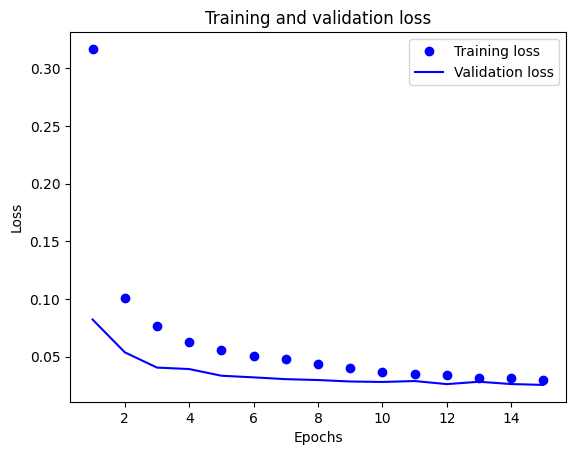

range(1, 16)


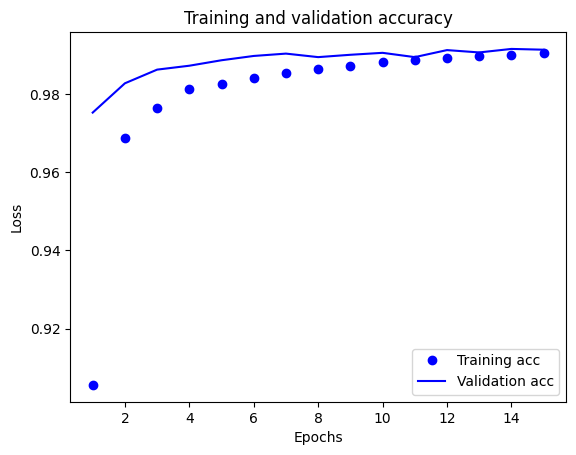

In [14]:
history_dict = history.history
plot_loss(history_dict)
plot_accuracy(history_dict)

In [16]:
# evaluate model
score = model.evaluate(x_test, y_test_one_hot, verbose=1)
print(score)

313/313 [==============================] - 2s 7ms/step - loss: 0.0254 - accuracy: 0.9914
[0.025436487048864365, 0.9914000630378723]


In [23]:
# prediction workflow
x = x_test[10:20]
y = y_test[10:20]

print(y)

# Need to reshape and normalize the image as we did before with the entire train set
# pre-process image / build a batch of one image to predict
x = x.astype('float32') / 255.0
x = x.reshape((x.shape[0], 28, 28, 1))
print('x.shape:', x.shape)

# predict
y_probs = model.predict(x)
# print out probs of the batch
print('y_probs.shape:', y_probs.shape)
print('y_probs:', y_probs)

# predict the value of the image.

# The result is a one-hot-encoded vector.
# Nedd to take the argmax value (the position with the highest probability) to get the result.
# get index/class of max prob
y_pred = np.argmax(y_probs, axis=1)
print("Prediction:", y_pred)

[0 6 9 0 1 5 9 7 3 4]
x.shape: (10, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step
y_probs.shape: (10, 10)
y_probs: [[0.09800341 0.19301076 0.11977345 0.07725393 0.06546484 0.10591485
  0.07357427 0.12437376 0.0628525  0.07977826]
 [0.09780171 0.1928477  0.11967798 0.07740808 0.06557681 0.10587592
  0.0736229  0.12457863 0.06279429 0.07981604]
 [0.09759208 0.19230346 0.11944837 0.07749372 0.06571387 0.10620838
  0.07344352 0.12500402 0.0627899  0.08000267]
 [0.09755271 0.19269767 0.11974796 0.07733974 0.06554241 0.1058978
  0.07342996 0.12512025 0.06280338 0.07986818]
 [0.09771497 0.19240806 0.11933676 0.07749914 0.06586873 0.10597342
  0.07371015 0.12443492 0.06286238 0.08019144]
 [0.09735541 0.19346704 0.11976179 0.07728071 0.06549373 0.10620782
  0.07335638 0.12447246 0.06260399 0.08000075]
 [0.09772581 0.1928553  0.11944453 0.07739841 0.06566167 0.1059171
  0.07348158 0.12483522 0.06279822 0.07988218]
 [0.09799435 0.19270413 0.11951809 0.0772244  0.06534854 0.105930

In [ ]:
# import
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, Dense, MaxPooling2D, Dropout

from tensorflow.keras.utils import to_categorical

# load dataset
# load the MNIST dataset, containing 70,000 28x28 images showing handwritten digits.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocess dataset
# training data
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
y_train_one_hot = to_categorical(y_train)
# test data
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_test_one_hot = to_categorical(y_test)

# variables
num_classes = 10
input_shape = (28, 28, 1)

# build the model
# a sequence of conv2D/MaxPool blocks plus a Dense layer as a classifier
model = Sequential()
# Input layer
model.add(Input(shape=input_shape))
# ConvNet Block 1
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# ConvNet Block 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Classifier
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))
# show model summary
model.summary()

# compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# train the model# hyper-parameters
batch_size = 128
epochs = 15
# train the model
history = model.fit(x_train, 
                    y_train_one_hot, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(x_test, y_test_one_hot))


# evaluate model
score = model.evaluate(x_test, y_test_one_hot, verbose=1)
print(score)